# Decision Tree Models for Regression

A regression tree is a decision tree used for regression. It is used to predict continuous values instead of discrete outputs.

In [1]:
import numpy as np; np.random.seed(50) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree

## Understanding Regression Trees

Let's start by generating some data.

### Generating Data

In [3]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 1.3, 1.2, 1.8, 2, 4.5, 4.7, 5.2, 5.6, 5])
df0 = pd.DataFrame({'X':X , 'y':y})
df0.head()

,X,y
0,1,1.0
1,2,1.3
2,3,1.2
3,4,1.8
4,5,2.0


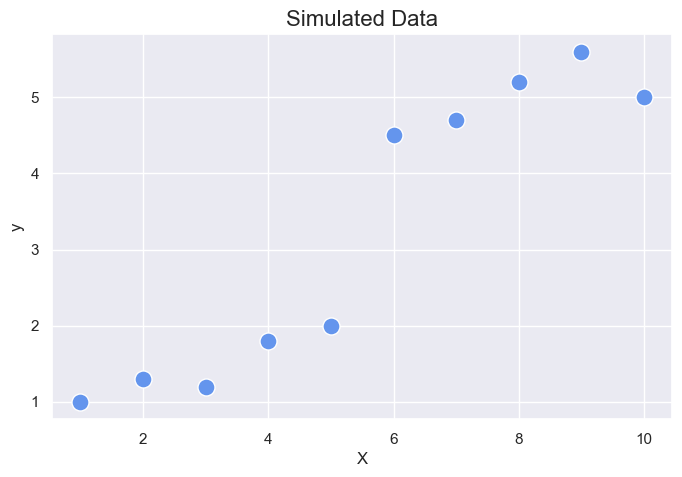

In [4]:
sns.set(rc={"figure.figsize":(8, 5)}) # width=8, height=5
sns.scatterplot(x=df0.X, y=df0.y, s=150, 
            color='cornflowerblue').set_title("Simulated Data", fontsize=16); 

In [5]:
# Splitting the sample into training and testing sets
X_train0, X_test0, y_train0, y_test0=train_test_split(df0.X, df0.y, test_size=0.30, random_state=10)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train0.shape[0], X_test0.shape[0])) 

Train Set: 7 cases, 	Test Set: 3 cases


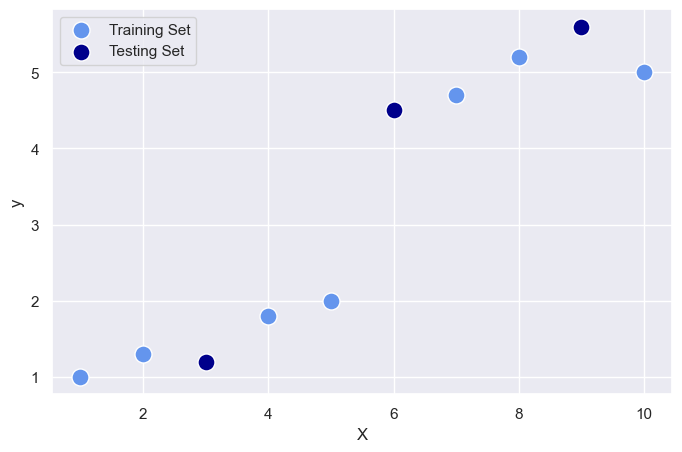

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=X_train0, y=y_train0, s=150, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=X_test0,  y=y_test0,  s=150, color='darkblue',       label='Testing Set');  

In [7]:
# Saving training and testing data
data_train0 = pd.concat([X_train0, y_train0], axis=1)
data_test0 = pd.concat([X_test0, y_test0], axis=1)

In [8]:
# Defining the variables for the model
X=data_train0.X.values.reshape(-1,1)
y=data_train0.y.values

### Regression Tree Model with max_depth = 1

In [9]:
# Initializing a simple model with a maximum depth of 1
regressor0 = tree.DecisionTreeRegressor(random_state=0, max_depth=1) 

In [10]:
# Fit the model
regressor0.fit(X, y) 

DecisionTreeRegressor(max_depth=1, random_state=0)

In [11]:
# Getting the R2
regressor0.score(X, y)

0.9641896169673947

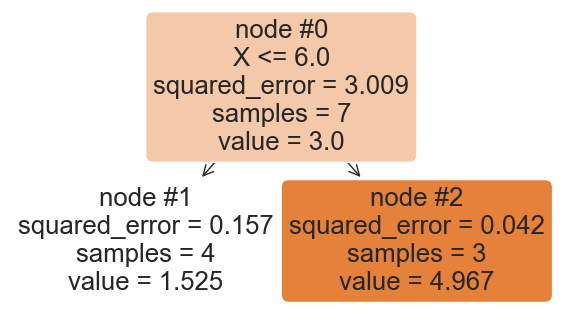

In [12]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(7, 4))
tree.plot_tree( regressor0,
                feature_names=['X'],
                filled=True,
                node_ids=True,
                rounded=True                 
                );

The Regression Tree algorithm computes the mean square error. It measures how much the model predictions deviate from the original target, that is, the amount of error in the model. 

- **node #0**: 
    - squared_error = 3.009, 
    - sample = 7 (all training cases)
    - value = 3.0 It is the average of the `y` of the 7 training cases  
    - The sample is split in two according to X < 6.0

- **node #1**: 
    - squared_error = 0.157, (Notice that it is lesser than the squared_error of the parent node)
    - sample = 4 
    - value = 1.525 It is the average of the `y` of the 4 training cases of the node 

- **node #3**: 
    - squared_error = 0.042, (Notice that it is lesser than the squared_error of the parent node)
    - sample = 3 
    - value = 4.967 It is the average of the `y` of the 3 training cases of the node 


In [13]:
# Print Text Representation of tree
text_tree = tree.export_text(regressor0)
print(text_tree)

|--- feature_0 <= 6.00
|   |--- value: [1.52]
|--- feature_0 >  6.00
|   |--- value: [4.97]



In [14]:
# Prediction with training and testing cases
data_train0['y_pred1']=regressor0.predict(data_train0.X.values.reshape(-1,1))
data_test0['y_pred1']=regressor0.predict(data_test0.X.values.reshape(-1,1))

In [15]:
# Computing R2 (R-squared)
print('Regression Tree (max_depth = 1) Training Set: R2 = %.3f' 
        %(r2_score(data_train0.y, data_train0.y_pred1)))
print('Regression Tree (max_depth = 1) Testing Set:  R2 = %.3f' 
        %(r2_score(data_test0.y, data_test0.y_pred1)))

Regression Tree (max_depth = 1) Training Set: R2 = 0.964
Regression Tree (max_depth = 1) Testing Set:  R2 = 0.108


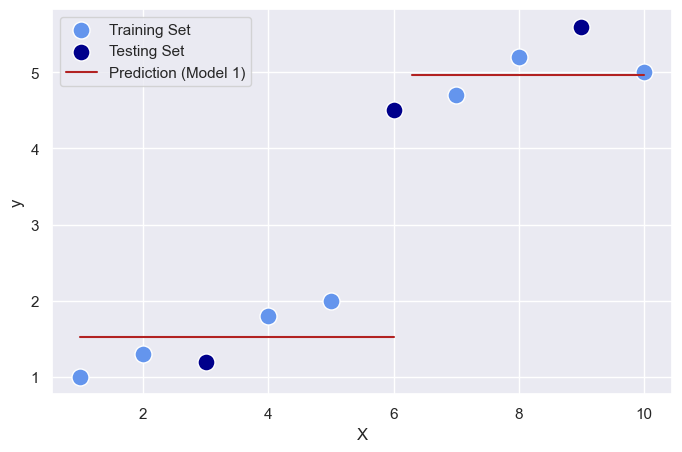

In [16]:
# Plotting the results
# Training data
sns.scatterplot(x=data_train0.X, y=data_train0.y, s=150, color='cornflowerblue', label='Training Set')
# Test data
sns.scatterplot(x=data_test0.X, y=data_test0.y, s=150, color='darkblue', label='Testing Set')
# node#1
sns.lineplot(x=[1,6], y=[1.525, 1.525], color='firebrick')
# node#2
sns.lineplot(x=[6.3,10], y=[4.967, 4.967], color='firebrick', label='Prediction (Model 1)');

Notice the biggest error is at x = 6!

### Regression Tree Model with max_depth = 2

In [17]:
regressor1 = tree.DecisionTreeRegressor(random_state=0, max_depth=2) 
regressor1.fit(X, y) 
regressor1.score(X, y)

0.9959639126305793

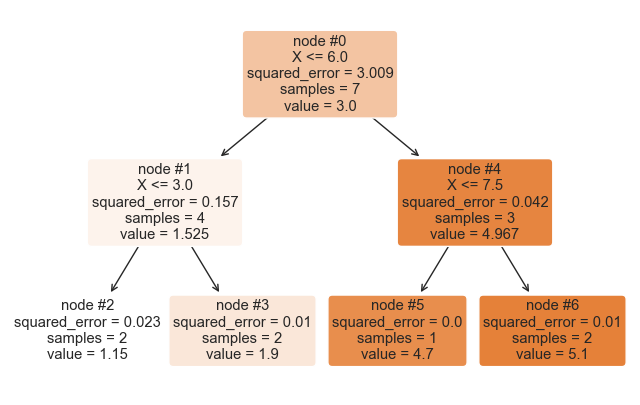

In [18]:
# Plotting the tree model
fig = plt.figure(figsize=(8, 5))
tree.plot_tree( regressor1,
                feature_names=['X'],
                filled=True,
                node_ids=True,
                rounded=True                 
                );

Let's analyze the leaf nodes. Remember, we are using only 7 cases to build the tree, which is a small sample size.

- **node #2**: 
    - squared_error = 0.023, 
    - samples = 2 
    - value = 1.15 It is the predicted value of `y` for X <= 3.0    

- **node #3**: 
    - squared_error = 0.01, 
    - samples = 2 
    - value = 1.9 It is the predicted value of `y` for 3.0 < X < 6.0

- **node #5**: 
    - squared_error = 0.0, (The squared error is pretty small)
    - sample = 1 
    - value = 4.7 It is the predicted value of `y` for 6.0 < X <= 7.5 

- **node #6**: 
    - squared_error = 0.01
    - samples = 2 
    - value = 5.1 It is the predicted value of `y` for X > 7.5 

In [19]:
# Prediction with training and testing cases
data_train0['y_pred2']=regressor1.predict(data_train0.X.values.reshape(-1,1))
data_test0['y_pred2']=regressor1.predict(data_test0.X.values.reshape(-1,1))

In [20]:
# Computing R2 (R-squared)
print('Regression Tree (max_depth = 2) Training Set: R2 = %.3f' 
            %(r2_score(data_train0.y, data_train0.y_pred2)))
print('Regression Tree (max_depth = 2) Testing Set:  R2 = %.3f' 
            %(r2_score(data_test0.y, data_test0.y_pred2)))

Regression Tree (max_depth = 2) Training Set: R2 = 0.996
Regression Tree (max_depth = 2) Testing Set:  R2 = 0.331


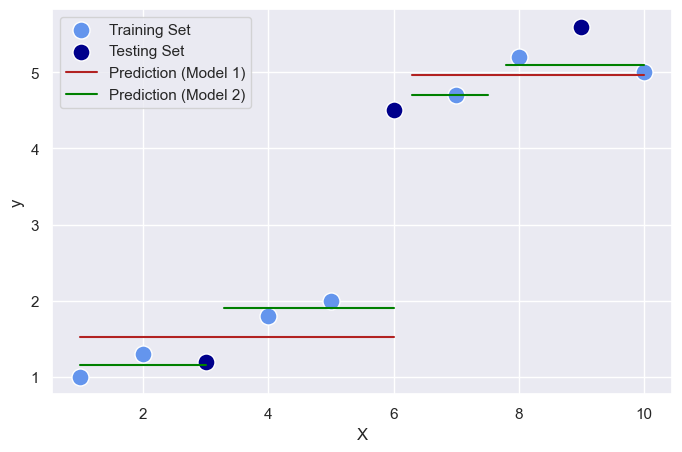

In [21]:
# Plotting the results
# Training data
sns.scatterplot(x=data_train0.X, y=data_train0.y, s=150, color='cornflowerblue', label='Training Set')
# Test data
sns.scatterplot(x=data_test0.X, y=data_test0.y, s=150, color='darkblue', label='Testing Set')
# node#1 Model 1
sns.lineplot(x=[1,6], y=[1.525, 1.525], color='firebrick')
# node#2 Model 1
sns.lineplot(x=[6.3,10], y=[4.967, 4.967], color='firebrick', label='Prediction (Model 1)');
# node#2 Model 2
sns.lineplot(x=[1,3], y=[1.15, 1.15], color='green')
# node#3 Model 2
sns.lineplot(x=[3.3,6], y=[1.9, 1.9], color='green')
# node#5 Model 2
sns.lineplot(x=[6.3,7.5], y=[4.7, 4.7], color='green')
# node#6 Model 2
sns.lineplot(x=[7.8,10], y=[5.1, 5.1], color='green', label='Prediction (Model 2)');

As you can see, Model 2 is better than Model 1. Notice the biggest error is still at x = 6!

## Advertising Data

The Advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [22]:
# Getting data
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Descriptive Statistics

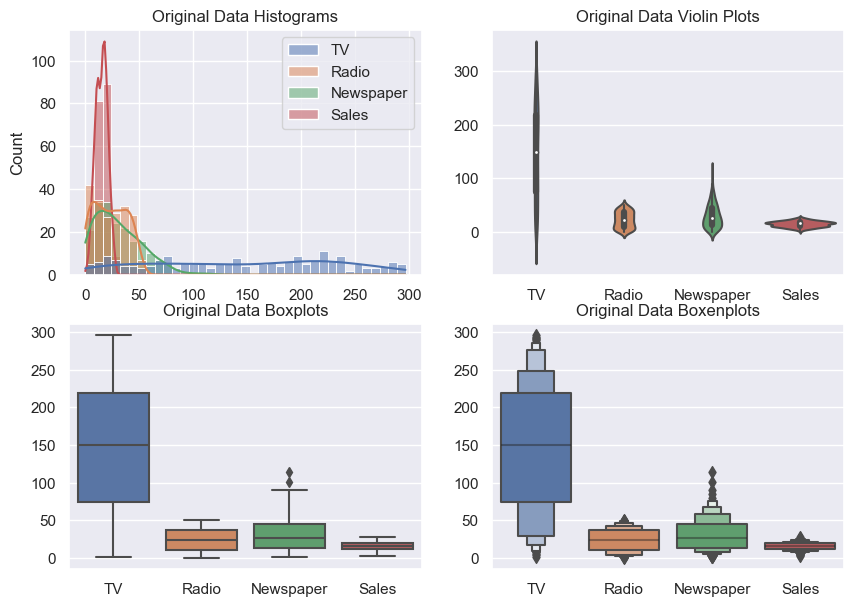

In [23]:
plt.figure(figsize=(10, 7))

plt.subplot(221)
sns.histplot(data = df, kde=True).set(title="Original Data Histograms")

plt.subplot(222)
sns.violinplot(data = df).set(title="Original Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = df).set(title="Original Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = df).set(title="Original Data Boxenplots");

## Simple Regression Tree Models

Let's start with a simple model.

In [24]:
# Features matrix
X = df[['TV']]
# Target variable
y = df.Sales

In [25]:
# Splitting the sample into train and test sets.
X_train1, X_test1, y_train1, y_test1=train_test_split(X, y, test_size=0.30, random_state=20)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train1.shape[0], X_test1.shape[0])) 

Train Set: 140 cases, 	Test Set: 60 cases


In [26]:
# Saving training and testing data
data_train1 = pd.concat([X_train1, y_train1], axis=1)
data_test1 = pd.concat([X_test1, y_test1], axis=1)

In [27]:
# Initialize and fit the model
regressor2 = tree.DecisionTreeRegressor(random_state=0, max_depth=2) 
regressor2.fit(X_train1, y_train1)
regressor2.score(X_test1, y_test1)

0.7859135359494335

In [28]:
# Prediction 
data_train1['y_pred1']=regressor2.predict(X_train1)
data_test1['y_pred1']=regressor2.predict(X_test1)

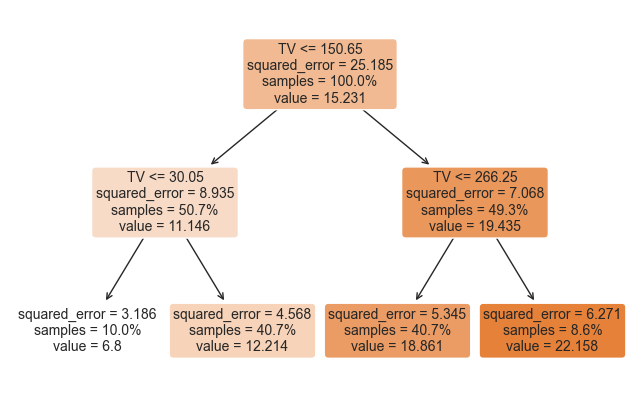

In [29]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(8,5))
tree.plot_tree( regressor2,
                feature_names=X_train1.columns,
                filled=True,
                proportion=True,
                rounded=True,                 
                );

In [30]:
# Computing R2 (R-squared)
print('Regression Tree Sales-TV (max_depth = 2) Training Set: R2 = %.3f' 
            %(r2_score(data_train1.Sales, data_train1.y_pred1)))
print('Regression Tree Sales-TV (max_depth = 2) Testing Set:  R2 = %.3f' 
            %(r2_score(data_test1.Sales, data_test1.y_pred1)))

Regression Tree Sales-TV (max_depth = 2) Training Set: R2 = 0.806
Regression Tree Sales-TV (max_depth = 2) Testing Set:  R2 = 0.786


Let's get another tree model.

In [31]:
regressor3 = tree.DecisionTreeRegressor(random_state=0, max_depth=3) 

In [32]:
# fit the model
regressor3.fit(X_train1, y_train1)
regressor3.score(X_test1, y_test1)

0.830749147540137

In [33]:
# Prediction with training and testing cases
data_train1['y_pred2']=regressor3.predict(X_train1)
data_test1['y_pred2']=regressor3.predict(X_test1)

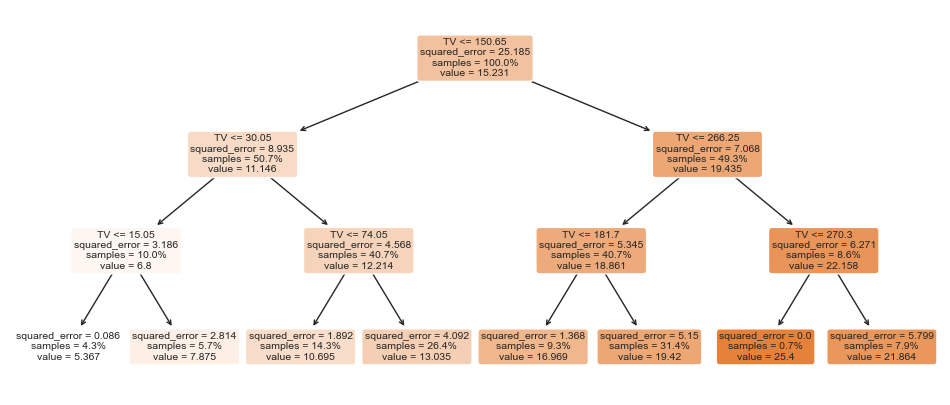

In [34]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(12,5))
tree.plot_tree( regressor3,
                feature_names=X_train1.columns,
                filled=True,
                proportion=True,
                rounded=True,                 
                );

In [35]:
# Computing R2 (R-squared)
print('Regression Tree Sales-TV (max_depth = 3) Training Set: R2 = %.3f' 
            %(r2_score(data_train1.Sales, data_train1.y_pred2)))
print('Regression Tree Sales-TV (max_depth = 2) Testing Set:  R2 = %.3f' 
            %(r2_score(data_test1.Sales, data_test1.y_pred2)))

Regression Tree Sales-TV (max_depth = 3) Training Set: R2 = 0.852
Regression Tree Sales-TV (max_depth = 2) Testing Set:  R2 = 0.831


In [36]:
data_test1.head()

,TV,Sales,y_pred1,y_pred2
150,280.7,16.1,22.158333,21.863636
28,248.8,18.9,18.861404,19.420455
13,97.5,13.7,12.214035,13.035135
178,276.7,16.8,22.158333,21.863636
109,255.4,19.8,18.861404,19.420455


### Computing RMSE for model comparison

In [37]:
# Computing RMSE on Training Sets
print('Regression Tree Sales-TV (max_depth = 2) Training Set - RMSE = %.4f' 
        %(mean_squared_error(data_train1.Sales, data_train1.y_pred1, squared=False)))
print('Regression Tree Sales-TV (max_depth = 3) Training Set - RMSE = %.4f' 
        %(mean_squared_error(data_train1.Sales, data_train1.y_pred2, squared=False)))

Regression Tree Sales-TV (max_depth = 2) Training Set - RMSE = 2.2118
Regression Tree Sales-TV (max_depth = 3) Training Set - RMSE = 1.9281


In [38]:
# Computing RMSE on Testing Sets
print('Regression Tree Sales-TV (max_depth = 2) Testing Set - RMSE = %.4f' 
        %(mean_squared_error(data_test1.Sales, data_test1.y_pred1, squared=False)))
print('Regression Tree Sales-TV (max_depth = 3) Testing Set - RMSE = %.4f' 
        %(mean_squared_error(data_test1.Sales, data_test1.y_pred2, squared=False)))

Regression Tree Sales-TV (max_depth = 2) Testing Set - RMSE = 2.6882
Regression Tree Sales-TV (max_depth = 3) Testing Set - RMSE = 2.3902


Remember, the lower the RMSE, the better a model fits the data. 

## Multiple Regression Tree Model

Let's create a more complicated model. The feature matrix will now be composed of three variables: `TV`, `Radio`, and `Newspaper`. Notice that the graphical representation is not an option anymore.

In [39]:
# Features matrix
X2 = df[['TV','Radio','Newspaper']]
# Target variable
y = df.Sales

In [40]:
# Splitting the sample into train and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.30, random_state=20)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train2.shape[0], X_test2.shape[0])) 

Train Set: 140 cases, 	Test Set: 60 cases


In [41]:
# Saving training and testing data
data_train2 = pd.concat([X_train2, y_train2], axis=1)
data_test2  = pd.concat([X_test2, y_test2], axis=1)

In [42]:
regressor4 = tree.DecisionTreeRegressor(random_state=0, max_depth=3) 
regressor4.fit(X_train2, y_train2)
regressor4.score(X_test2, y_test2)

0.8912988027830719

In [43]:
# Prediction 
data_train2['y_pred1']=regressor4.predict(X_train2)
data_test2['y_pred1']=regressor4.predict(X_test2)

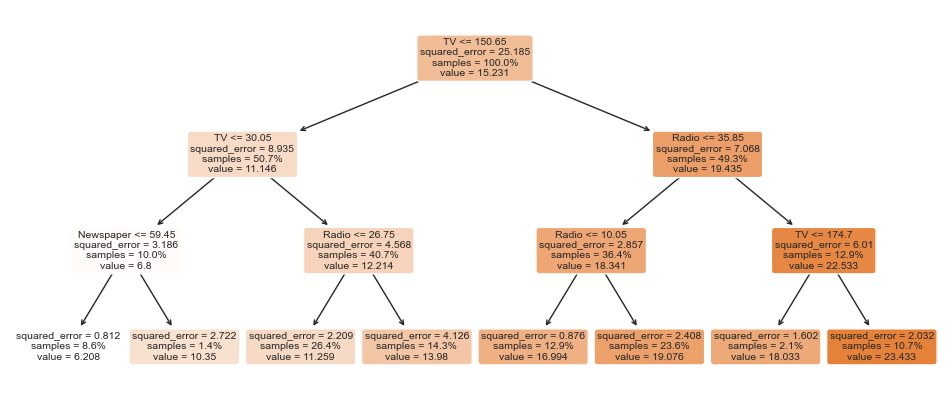

In [44]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(12,5))
tree.plot_tree( regressor4,
                feature_names=X_train2.columns,
                filled=True,
                proportion=True,
                rounded=True,                 
                );

In [45]:
# Computing R2 (R-squared)
print('Regression Tree - Training Set: R2 = %.3f' 
            %(r2_score(data_train2.Sales, data_train2.y_pred1)))
print('Regression Tree - Testing Set:  R2 = %.3f' 
            %(r2_score(data_test2.Sales, data_test2.y_pred1)))

Regression Tree - Training Set: R2 = 0.912
Regression Tree - Testing Set:  R2 = 0.891


Let's remove the max_depth parameter.

In [46]:
regressor5 = tree.DecisionTreeRegressor(random_state=0) 
regressor5.fit(X_train2, y_train2)
regressor5.score(X_test2, y_test2)

0.902186774871827

In [47]:
# Finding the tree max depth
regressor5.tree_.max_depth

14

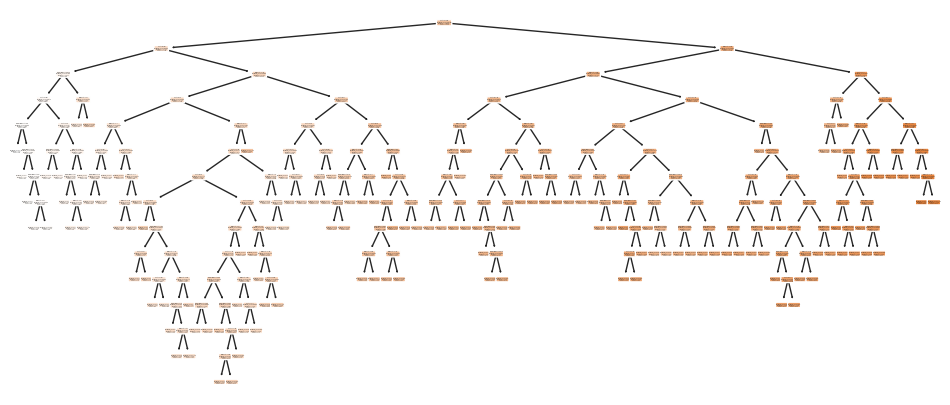

In [48]:
# Plotting the tree model
fig = plt.figure(figsize=(12,5))
tree.plot_tree( regressor5,
                feature_names=X_train2.columns,
                filled=True,
                proportion=True,
                rounded=True,                 
                );

What did you understand? The tree is too big to be represented in a single, understandable graphic.

## References

- https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5